# Luis Martins
**Student Number:** 2025053
**Programme:** HDip in Sci in Data Analytics for Business
**GitHub:** [https://github.com/CCT-Dublin/ca1-50-LuiisClaudio](https://github.com/CCT-Dublin/ca1-50-LuiisClaudio)

**Date:** October 31, 2025

---

> **Dr. Muhammad Iqbal**
>
> CCT College Dublin
>
> **Module:** Machine Learning for Business

---

# Data Preparation

## Step 1: Import Necessary Libraries

First, we import all the Python libraries we'll need for data loading, cleaning, and transformation.

In [1]:
import pandas as pd
import numpy as np

## Step 2: Load the Data

We load the `PPR-ALL.csv` file into a pandas DataFrame. It's important to set `low_memory=False` to avoid mixed-type warnings due to the size of the dataset.

In [2]:
# Define the file path
file_path = 'PPR-ALL.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)


## Step 3: Initial Data Inspection

Let's get a first look at our data to understand its structure, identify data types, and find any obvious issues like missing values.

In [3]:
df.head()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


# ---

In [4]:
# Get a summary of the DataFrame (data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748893 entries, 0 to 748892
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  748893 non-null  object
 1   Address                    748893 non-null  object
 2   County                     748893 non-null  object
 3   Eircode                    206320 non-null  object
 4   Price ()                  748893 non-null  object
 5   Not Full Market Price      748893 non-null  object
 6   VAT Exclusive              748893 non-null  object
 7   Description of Property    748893 non-null  object
 8   Property Size Description  52834 non-null   object
dtypes: object(9)
memory usage: 51.4+ MB


In [5]:
# Check for the number of missing values (represented as nulls or empty strings)
print("\nMissing Value Counts:")
for col in df.columns:
    # Check for standard NaN values
    null_count = df[col].isnull().sum()
    
    # Check for empty strings "" which seem to be used for missing data
    empty_string_count = (df[col] == '""').sum() + (df[col] == '').sum() + (df[col] == ' ').sum()
    
    print(f"{col}: {null_count + empty_string_count} missing values")


Missing Value Counts:
Date of Sale (dd/mm/yyyy): 0 missing values
Address: 0 missing values
County: 0 missing values
Eircode: 542573 missing values
Price (): 0 missing values
Not Full Market Price: 0 missing values
VAT Exclusive: 0 missing values
Description of Property: 0 missing values
Property Size Description: 696059 missing values


### Initial Findings:

1.  **Target Variable:** `Price (€)` is an `object` (string) type. It contains '€' and ',' characters. It must be converted to a numeric type (float) to be used as a target for regression.
2.  **Date:** `Date of Sale (dd/mm/yyyy)` is an `object`. This should be converted to a datetime object so we can extract features like `Year` and `Month`, which likely influence price.
3.  **Missing Data:**
    * `Eircode` and `Property Size Description` have a very large number of missing values (represented as empty strings `""` in the CSV snippet).
4.  **Categorical Data:** `County`, `Not Full Market Price`, `VAT Exclusive`, and `Description of Property` are all `object` types and will need to be encoded.
5.  **High Cardinality:** `Address` and `Eircode` have too many unique values to be used directly in one-hot encoding. `Address` is free-text, and `Eircode` is sparse. We will likely drop these to simplify the model.

## Step 4: Data Cleaning & Feature Engineering

In [6]:
df.head()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


OBS: For the segmentation part we are only considering the biggest counties from Ireland

In [7]:
# Filter the data to include only properties in County Dublin, Cork, Galway, and Limerick
df = df[df['County'].isin(['Dublin', 'Cork', 'Galway', 'Limerick'])].copy()

print(f"Number of properties in Dublin, Cork, Galway, and Limerick: {df.shape[0]}")
print("\nBreakdown by county:")
print(df['County'].value_counts())

Number of properties in Dublin, Cork, Galway, and Limerick: 381358

Breakdown by county:
County
Dublin      234881
Cork         82637
Galway       36232
Limerick     27608
Name: count, dtype: int64


In [8]:
# Filter the original dataframe for properties sold in 2024 and 2025
#df = df[(df['Date of Sale (dd/mm/yyyy)'].str.contains('/2025'))].copy() #str.contains('/2024|/2025'))].copy()

#print(f"Number of properties sold in 2025: {df.shape[0]}")
#df.head()

### 4.1. Clean Target Variable: `Price`

In [9]:
# Create a copy to avoid SettingWithCopyWarning
#data = df.head(5000).copy()
data = df.copy()

# Rename columns to be more Python-friendly (remove spaces, symbols)
data.columns = ['Date_of_Sale', 'Address', 'County', 'Eircode', 'Price', 
                  'Not_Full_Market_Price', 'VAT_Exclusive', 'Description_of_Property', 
                  'Property_Size_Description']

# Clean the 'Price' column
data['Price'] = data['Price'].astype(str).str.replace('€', '', regex=False).str.replace(',', '', regex=False).str.replace('', '', regex=False).str.strip()
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

print("Price column cleaned and converted to numeric.")
print(data['Price'].describe())

Price column cleaned and converted to numeric.
count    3.813580e+05
mean     3.939587e+05
std      1.493168e+06
min      5.030530e+03
25%      1.900000e+05
50%      2.907489e+05
75%      4.229070e+05
max      2.250000e+08
Name: Price, dtype: float64


### 4.2. Feature Engineering: `Date_of_Sale`

In [10]:
# Convert 'Date_of_Sale' to datetime objects
data['Date_of_Sale'] = pd.to_datetime(data['Date_of_Sale'], format='%d/%m/%Y')

# Extract 'Year' and 'Month' as new features
data['Sale_Year'] = data['Date_of_Sale'].dt.year
data['Sale_Month'] = data['Date_of_Sale'].dt.month

print("New features 'Sale_Year' and 'Sale_Month' created.")
data[['Date_of_Sale', 'Sale_Year', 'Sale_Month']].head()

New features 'Sale_Year' and 'Sale_Month' created.


,Date_of_Sale,Sale_Year,Sale_Month
0,2010-01-01,2010,1
2,2010-01-04,2010,1
5,2010-01-04,2010,1
6,2010-01-04,2010,1
8,2010-01-04,2010,1


### 4.3. Handle Other Categorical Features & Missing Values

We will clean up the string values and fill missing values (`""`) with a consistent 'Unknown' category. This prepares them for one-hot encoding.

In [11]:
# Clean and impute 'Description_of_Property'
# Replace empty/whitespace strings with 'Unknown'
data['Description_of_Property'] = data['Description_of_Property'].replace(['""', '', ' '], 'Unknown')
# Fill standard NaNs with 'Unknown' as well
data['Description_of_Property'] = data['Description_of_Property'].fillna('Unknown')
# There are two variations of 'New Dwelling...' in the data, let's standardize them.
data['Description_of_Property'] = data['Description_of_Property'].replace({
    'New Dwelling house /Apartment': 'New Dwelling',
    'Second-Hand Dwelling house /Apartment': 'Second-Hand Dwelling',
    'Teach/Árasán Cónaithe Nua': 'New Dwelling',
    'Teach/?ras?n C?naithe Nua': 'New Dwelling',
    'Teach/Árasán Cónaithe Atháimhe': 'Second-Hand Dwelling'
})


# Clean and impute 'County'
data['County'] = data['County'].fillna('Unknown')

print("Categorical columns cleaned and missing values imputed with 'Unknown'.")
print("\nUnique values in 'Description_of_Property':")
print(data['Description_of_Property'].value_counts())

Categorical columns cleaned and missing values imputed with 'Unknown'.

Unique values in 'Description_of_Property':
Description_of_Property
Second-Hand Dwelling    316269
New Dwelling             65089
Name: count, dtype: int64


### 4.4. Clean Binary Categorical Features

We'll convert the 'Yes'/'No' columns to integers (1/0).

In [12]:
data['Not_Full_Market_Price'] = data['Not_Full_Market_Price'].map({'Yes': 1, 'No': 0})
data['VAT_Exclusive'] = data['VAT_Exclusive'].map({'Yes': 1, 'No': 0})
data['Description_of_Property'] = data['Description_of_Property'].map({'New Dwelling': 1, 'Second-Hand Dwelling': 0})

print("Binary columns 'Not_Full_Market_Price', 'VAT_Exclusive', 'Description_of_Property' mapped to 1/0.")
data[['Not_Full_Market_Price', 'VAT_Exclusive', 'Description_of_Property']].head()

Binary columns 'Not_Full_Market_Price', 'VAT_Exclusive', 'Description_of_Property' mapped to 1/0.


,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property
0,0,0,0
2,0,0,0
5,0,0,0
6,0,0,0
8,0,0,0


### 4.5. Feature Selection: Dropping Unused Columns

In [13]:
columns_to_drop = ['Date_of_Sale', 'Address', 'Eircode', 'Property_Size_Description']
data_cleaned = data.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")
print("\nCleaned data head:")
data_cleaned.head()

Dropped columns: ['Date_of_Sale', 'Address', 'Eircode', 'Property_Size_Description']

Cleaned data head:


,County,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Sale_Year,Sale_Month
0,Dublin,343000.0,0,0,0,2010,1
2,Dublin,438500.0,0,0,0,2010,1
5,Dublin,425000.0,0,0,0,2010,1
6,Limerick,172500.0,0,0,0,2010,1
8,Cork,180000.0,0,0,0,2010,1


### 4.6. Keeping or Not 'Not Full Market Price' 

For a price prediction model, sales that were **not** at full market price could skew the results. However, we're are keeping this feature... But if we wanna show more representative data, we should filter these out to train the model

In [14]:
original_rows = data_cleaned.shape[0]

# For now Im keeping Not_Full_Market_Price to feed to the model with my features
data_final = data_cleaned.copy() #[data_cleaned['Not_Full_Market_Price'] == 0].copy()
# Now that we've filtered, we can drop this column as it's no longer needed as a feature.
# data_final = data_final.drop(columns=['Not_Full_Market_Price'])

# Removing description of property because it is not relevant for our cluster analysis
# data_final = data_final.drop(columns=['Description_of_Property'])

data_ts_final = data_final.copy()

# Filter for properties sold in 2025
data_final = data_final[data_final['Sale_Year'].isin([2025])].copy()
print(f"Number of properties sold in 2025: {data_final.shape[0]}")
print("\nBreakdown by year:")
print(data_final['Sale_Year'].value_counts().sort_index())
# data_final = data_final.head(10000) # Limit to first 10000 rows
data_final.head()


Number of properties sold in 2025: 22103

Breakdown by year:
Sale_Year
2025    22103
Name: count, dtype: int64


,County,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Sale_Year,Sale_Month
705877,Dublin,239000.0,0,0,0,2025,1
705879,Dublin,326000.0,0,0,0,2025,1
705881,Cork,230000.0,0,0,0,2025,1
705882,Dublin,1050000.0,0,0,0,2025,1
705885,Cork,370000.0,0,0,0,2025,1


## Handle categorical data

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'County' column using LabelEncoder
label_encoder = LabelEncoder()
data_final['County_Encoded'] = label_encoder.fit_transform(data_final['County'])

# Drop the original 'County' column as we now have the encoded version
data_final = data_final.drop(columns=['County'])
# Filter to only include properties below €5 million
data_final = data_final[data_final['Price'] < 5000000].copy()
print(f"Number of properties below €5 million: {data_final.shape[0]}")

# Show the mapping of counties to encoded values
county_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nCounty to Encoded Value Mapping:")
for county, encoded_value in sorted(county_mapping.items(), key=lambda x: x[1]):
    print(f"{county}: {encoded_value}")

Number of properties below €5 million: 22057

County to Encoded Value Mapping:
Cork: 0
Dublin: 1
Galway: 2
Limerick: 3


In [16]:
# Show the final cleaned and encoded data
data_final.head(10)

,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Sale_Year,Sale_Month,County_Encoded
705877,239000.0,0,0,0,2025,1,1
705879,326000.0,0,0,0,2025,1,1
705881,230000.0,0,0,0,2025,1,0
705882,1050000.0,0,0,0,2025,1,1
705885,370000.0,0,0,0,2025,1,0
705886,395000.0,0,0,0,2025,1,1
705888,340000.0,0,0,0,2025,1,1
705891,158000.0,0,0,0,2025,1,3
705892,275000.0,0,0,0,2025,1,0
705894,1480000.0,0,0,0,2025,1,1


In [17]:
# Select features for clustering: Price and Location (County)
features_for_clustering = data_final[['Price', 'County_Encoded', 'Description_of_Property']]
features_for_clustering.head()

,Price,County_Encoded,Description_of_Property
705877,239000.0,1,0
705879,326000.0,1,0
705881,230000.0,0,0
705882,1050000.0,1,0
705885,370000.0,0,0


# K-Means Algo

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
data_final_kmeans = data_final.copy()

# Select features for clustering: Price and Location (County)
features_for_clustering = data_final[['Price', 'County_Encoded', 'Description_of_Property']]

# Scale the features
scaler_segment = StandardScaler()
features_scaled = scaler_segment.fit_transform(features_for_clustering)
#features_scaled = features_for_clustering.values

# Apply K-Means with k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data_final_kmeans['Market_Segment_Label'] = kmeans.fit_predict(features_scaled)

# Display the distribution of properties across the new segments
print("Distribution of properties across market segments:")
print(data_final_kmeans['Market_Segment_Label'].value_counts())

Distribution of properties across market segments:
Market_Segment_Label
1    10275
0     4208
3     3566
2     3080
4      928
Name: count, dtype: int64


In [19]:
# Analyze the clusters to assign meaningful names
segment_price_analysis = data_final_kmeans.groupby('Market_Segment_Label')['Price'].mean().sort_values()

# Create a mapping from cluster label to segment name
segment_name_map = {
    segment_price_analysis.index[0]: 'Starter/Budget',
    segment_price_analysis.index[1]: 'Affordable Family',
    segment_price_analysis.index[2]: 'Mid-Range',
    segment_price_analysis.index[3]: 'Upper-Mid',
    segment_price_analysis.index[4]: 'Premium'#,
    #segment_price_analysis.index[5]: 'Luxury'
}

# Apply the mapping
data_final_kmeans['Market_Segment'] = data_final_kmeans['Market_Segment_Label'].map(segment_name_map)

data_final_kmeans.head()

,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Sale_Year,Sale_Month,County_Encoded,Market_Segment_Label,Market_Segment
705877,239000.0,0,0,0,2025,1,1,1,Upper-Mid
705879,326000.0,0,0,0,2025,1,1,1,Upper-Mid
705881,230000.0,0,0,0,2025,1,0,3,Affordable Family
705882,1050000.0,0,0,0,2025,1,1,1,Upper-Mid
705885,370000.0,0,0,0,2025,1,0,3,Affordable Family


# K-Mean Result

In [20]:
# Define the desired order for market segments
segment_order = ['Starter/Budget', 'Affordable Family', 'Mid-Range', 'Upper-Mid', 'Premium']#, 'Luxury']

# Display a statistical summary of price for each market segment
print("Price Summary by Market Segment:")
# Format the output for better readability
price_summary = data_final_kmeans.groupby('Market_Segment')['Price'].describe()
for col in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
    price_summary[col] = price_summary[col].apply(lambda x: f"€{x:,.2f}")

price_summary.reindex(segment_order)

Price Summary by Market Segment:


,count,mean,std,min,25%,50%,75%,max
Market_Segment,,,,,,,,
Starter/Budget,3080.0,"€319,369.25","€150,404.79","€5,500.00","€220,000.00","€312,636.67","€393,153.08","€1,265,000.00"
Affordable Family,3566.0,"€344,530.14","€172,251.15","€7,500.00","€235,000.00","€320,000.00","€430,000.00","€1,085,000.00"
Mid-Range,4208.0,"€449,308.64","€164,148.24","€22,000.00","€351,459.25","€421,585.90","€493,392.07","€1,325,000.00"
Upper-Mid,10275.0,"€490,423.47","€197,858.20","€6,000.00","€350,000.00","€450,450.00","€603,000.00","€1,090,000.00"
Premium,928.0,"€1,689,935.16","€667,613.78","€1,098,000.00","€1,240,619.08","€1,440,000.00","€1,892,500.00","€4,921,395.26"


# Best K-Means

In [21]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

# K-means clustering evaluation metrics

ks = range(2, 11)  # evaluate k from 2 to 10
inertias = []
sil_scores = []
db_scores = []

features_for_clustering_all_features = data_final[['Price', 'Description_of_Property', 'County_Encoded']]

# Scale the features
scaler_segment = StandardScaler()
features_scaled = scaler_segment.fit_transform(features_for_clustering_all_features)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(features_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(features_for_clustering_all_features, labels))
    db_scores.append(davies_bouldin_score(features_for_clustering_all_features, labels))

# Print results
print("k\tInertia\t\tSilhouette\tDavies-Bouldin")
for k, i, s, d in zip(ks, inertias, sil_scores, db_scores):
    print(f"{k}\t{int(i):10d}\t{s:0.4f}\t\t{d:0.4f}")

# Select best k by each metric
best_k_sil = ks[int(np.argmax(sil_scores))]
best_k_db = ks[int(np.argmin(db_scores))]
print(f"\nBest k by silhouette score: {best_k_sil} (score={max(sil_scores):0.4f})")
print(f"Best k by Davies-Bouldin index: {best_k_db} (index={min(db_scores):0.4f})")



k	Inertia		Silhouette	Davies-Bouldin
2	     44033	-0.1050		18.6065
3	     31448	-0.1852		6.6168
4	     20370	-0.0964		131.8606
5	     15549	-0.1005		6.6130
6	     12191	-0.0170		8.5204
7	      9417	-0.1484		6.6961
8	      7810	-0.1571		6.4993
9	      6313	-0.0870		17.1857
10	      5192	-0.1001		90.9546

Best k by silhouette score: 6 (score=-0.0170)
Best k by Davies-Bouldin index: 8 (index=6.4993)


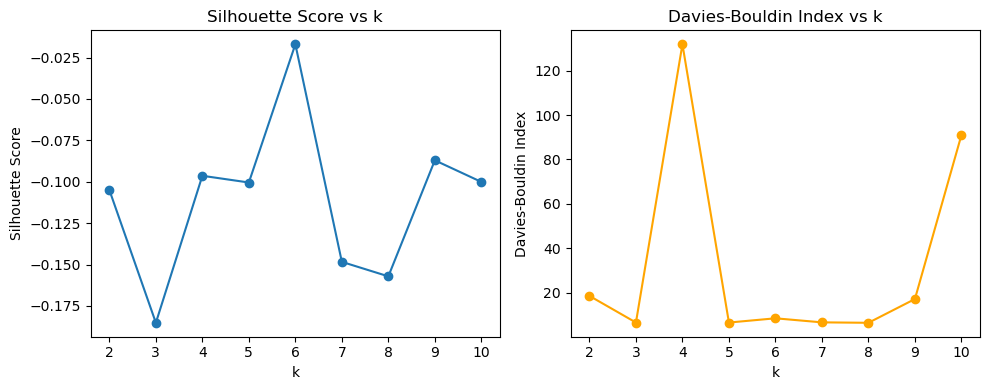

In [22]:
# Plot the metrics
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ks, sil_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

plt.subplot(1,2,2)
plt.plot(ks, db_scores, marker='o', color='orange')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Index')
plt.tight_layout()
plt.show()

# Fuzzy C-Means

In [23]:
# Select features for clustering: Price, County, and Property Description
features_for_fuzzy = data_final[['Price', 'County_Encoded', 'Description_of_Property']]
features_for_fuzzy.head()

,Price,County_Encoded,Description_of_Property
705877,239000.0,1,0
705879,326000.0,1,0
705881,230000.0,0,0
705882,1050000.0,1,0
705885,370000.0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from fcmeans import FCM as FuzzyCMeans

# Create a copy of the data
data_final_fuzzy = data_final.copy()

# Select features for clustering: Price, County, and Property Description
features_for_fuzzy = data_final[['Price', 'County_Encoded', 'Description_of_Property']]

# Scale the features
scaler_fuzzy = StandardScaler()
features_scaled = scaler_fuzzy.fit_transform(features_for_fuzzy)
#features_scaled = features_for_fuzzy.values

# Apply Fuzzy C-Means with c=5 clusters
fuzzy_model = FuzzyCMeans(n_clusters=5, m=2, random_state=42, max_iter=150)
fuzzy_model.fit(features_scaled)

# Get hard cluster assignments (highest membership)
data_final_fuzzy['Market_Segment_Label'] = fuzzy_model.predict(features_scaled)

# Store membership values for analysis
data_final_fuzzy['Max_Membership'] = fuzzy_model.u.max(axis=1)

# Display the distribution of properties across the new segments
print("Distribution of properties across market segments:")
print(data_final_fuzzy['Market_Segment_Label'].value_counts().sort_index())
print(f"\nAverage membership strength: {data_final_fuzzy['Max_Membership'].mean():.4f}")

Distribution of properties across market segments:
Market_Segment_Label
0    4219
1    3050
2    3493
3    2585
4    8710
Name: count, dtype: int64

Average membership strength: 0.7914


In [25]:
# Analyze the clusters to assign meaningful names
segment_price_analysis = data_final_fuzzy.groupby('Market_Segment_Label')['Price'].mean().sort_values()

# Create a mapping from cluster label to segment name
segment_name_map = {
    segment_price_analysis.index[0]: 'Starter/Budget',
    segment_price_analysis.index[1]: 'Affordable Family',
    segment_price_analysis.index[2]: 'Mid-Range',
    segment_price_analysis.index[3]: 'Upper-Mid',
    segment_price_analysis.index[4]: 'Premium'#,
    #segment_price_analysis.index[5]: 'Luxury'
}

# Apply the mapping
data_final_fuzzy['Market_Segment'] = data_final_fuzzy['Market_Segment_Label'].map(segment_name_map)

data_final_fuzzy.head()

,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Sale_Year,Sale_Month,County_Encoded,Market_Segment_Label,Max_Membership,Market_Segment
705877,239000.0,0,0,0,2025,1,1,4,0.740557,Mid-Range
705879,326000.0,0,0,0,2025,1,1,4,0.903435,Mid-Range
705881,230000.0,0,0,0,2025,1,0,2,0.932378,Affordable Family
705882,1050000.0,0,0,0,2025,1,1,3,0.969111,Premium
705885,370000.0,0,0,0,2025,1,0,2,0.981580,Affordable Family


In [26]:
# Define the desired order for market segments
segment_order = ['Starter/Budget', 'Affordable Family', 'Mid-Range', 'Upper-Mid', 'Premium']#, 'Luxury']

# Count properties by County in the fuzzy clustering results
county_counts = data_final_fuzzy.groupby('County_Encoded').size().reset_index(name='Count')

# Map county codes back to names for better readability
county_names = {v: k for k, v in county_mapping.items()}
county_counts['County'] = county_counts['County_Encoded'].map(county_names)

# Display the counts
print("Property Count by County (Fuzzy C-Means):")
print(county_counts[['County', 'Count']].to_string(index=False))

# Also show the distribution by county and market segment
county_segment_counts = data_final_fuzzy.groupby(['County_Encoded', 'Market_Segment']).size().reset_index(name='Count')
county_segment_counts['County'] = county_segment_counts['County_Encoded'].map(county_names)

# Pivot for better visualization
county_segment_pivot = county_segment_counts.pivot_table(
    index='County', 
    columns='Market_Segment', 
    values='Count', 
    fill_value=0
)[segment_order]

print("\nProperty Count by County and Market Segment:")
county_segment_pivot

Property Count by County (Fuzzy C-Means):
  County  Count
    Cork   5058
  Dublin  13485
  Galway   1908
Limerick   1606

Property Count by County and Market Segment:


Market_Segment,Starter/Budget,Affordable Family,Mid-Range,Upper-Mid,Premium
County,,,,,
Cork,0.0,3493.0,0.0,1436.0,129.0
Dublin,0.0,0.0,8710.0,2407.0,2368.0
Galway,1448.0,0.0,0.0,376.0,84.0
Limerick,1602.0,0.0,0.0,0.0,4.0


# Fuzzy Results

In [27]:
# Display a statistical summary of price for each market segment
print("Price Summary by Market Segment:")
# Format the output for better readability
price_summary = data_final_fuzzy.groupby('Market_Segment')['Price'].describe()
for col in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
    price_summary[col] = price_summary[col].apply(lambda x: f"€{x:,.2f}")

price_summary.reindex(segment_order)

Price Summary by Market Segment:


,count,mean,std,min,25%,50%,75%,max
Market_Segment,,,,,,,,
Starter/Budget,3050.0,"€315,002.88","€144,215.22","€5,500.00","€220,000.00","€310,000.00","€392,052.50","€1,200,000.00"
Affordable Family,3493.0,"€332,595.40","€152,291.01","€7,500.00","€232,000.00","€320,000.00","€420,000.00","€800,000.00"
Mid-Range,8710.0,"€426,912.66","€133,704.80","€6,000.00","€330,000.00","€420,000.00","€525,000.00","€701,000.00"
Upper-Mid,4219.0,"€451,654.72","€170,237.78","€22,000.00","€351,541.41","€422,665.00","€493,392.07","€1,365,639.00"
Premium,2585.0,"€1,146,556.44","€575,218.52","€702,000.00","€800,000.00","€930,000.00","€1,265,000.00","€4,921,395.26"


# Best Fuzzy

In [28]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Fuzzy C-Means Implementation
import matplotlib.pyplot as plt

# Use the same scaled data
X_scaled_fcm = features_scaled.copy()

c_values = range(2, 11)  # number of clusters
fcm_inertias = []
fcm_sil_scores = []
fcm_db_scores = []

for c in c_values:
    fcm = FuzzyCMeans(n_clusters=c, m=2, random_state=42)
    fcm.fit(X_scaled_fcm)
    labels = fcm.predict(X_scaled_fcm)
    
    # Calculate metrics
    fcm_sil_scores.append(silhouette_score(X_scaled_fcm, labels))
    fcm_db_scores.append(davies_bouldin_score(X_scaled_fcm, labels))

# Print results
print("\nc\tSilhouette\tDavies-Bouldin")
for c, s, d in zip(c_values, fcm_sil_scores, fcm_db_scores):
    print(f"{c}\t{s:0.4f}\t\t{d:0.4f}")

# Select best c by each metric
best_c_sil = c_values[int(np.argmax(fcm_sil_scores))]
best_c_db = c_values[int(np.argmin(fcm_db_scores))]
print(f"\nBest c by silhouette score: {best_c_sil} (score={max(fcm_sil_scores):0.4f})")
print(f"Best c by Davies-Bouldin index: {best_c_db} (index={min(fcm_db_scores):0.4f})")


c	Silhouette	Davies-Bouldin
2	0.5072		0.8249
3	0.3673		1.0736
4	0.2401		1.5351
5	0.5500		0.6803
6	0.1988		2.3744
7	0.5495		0.5855
8	0.5297		0.5861
9	0.5113		0.6025
10	0.5014		0.6641

Best c by silhouette score: 5 (score=0.5500)
Best c by Davies-Bouldin index: 7 (index=0.5855)


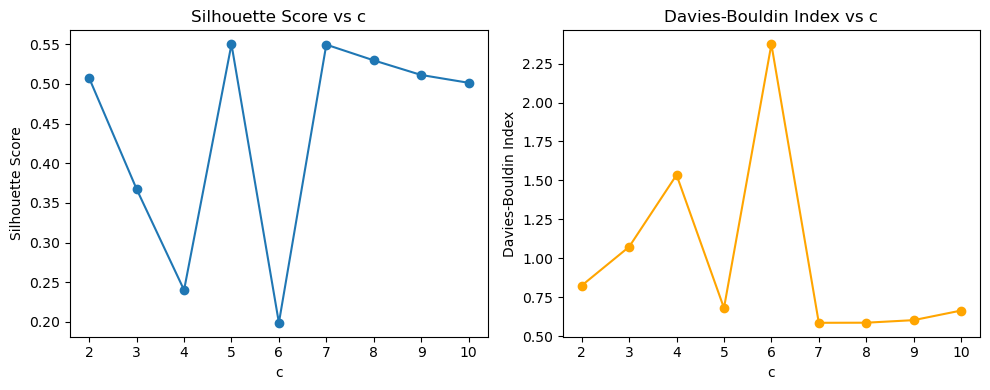

In [29]:
# Plot the metrics
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(c_values, fcm_sil_scores, marker='o')
plt.title('Silhouette Score vs c')
plt.xlabel('c')
plt.ylabel('Silhouette Score')

plt.subplot(1,2,2)
plt.plot(c_values, fcm_db_scores, marker='o', color='orange')
plt.title('Davies-Bouldin Index vs c')
plt.xlabel('c')
plt.ylabel('Davies-Bouldin Index')
plt.tight_layout()
plt.show()

# Cluster Visualization Insights

## Clean a little bit the outliers from each market segment to show an more honest frame from the housing prices

In [30]:
# Clean outliers from each market segment using IQR method
data_final_kmeans_cleaned = data_final_kmeans.copy()

In [31]:
# Clean outliers from each market segment using IQR method
data_final_fuzzy_cleaned = data_final_fuzzy.copy()

# Calculate IQR for each market segment and remove outliers
for segment in data_final_fuzzy_cleaned['Market_Segment'].unique():
    # Get data for this segment
    segment_data = data_final_fuzzy_cleaned[data_final_fuzzy_cleaned['Market_Segment'] == segment]['Price']
    
    # Calculate Q1, Q3, and IQR
    Q1 = segment_data.quantile(0.25)
    Q3 = segment_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers for this segment
    segment_mask = data_final_fuzzy_cleaned['Market_Segment'] == segment
    price_mask = (data_final_fuzzy_cleaned['Price'] >= lower_bound) & (data_final_fuzzy_cleaned['Price'] <= upper_bound)
    data_final_fuzzy_cleaned = data_final_fuzzy_cleaned[~segment_mask | price_mask]
    
    print(f"{segment}: Removed {segment_data.shape[0] - data_final_fuzzy_cleaned[data_final_fuzzy_cleaned['Market_Segment'] == segment].shape[0]} outliers")
    print(f"  Price range: €{lower_bound:,.2f} - €{upper_bound:,.2f}")

print(f"\nOriginal dataset size: {len(data_final_fuzzy)}")
print(f"Cleaned dataset size: {len(data_final_fuzzy_cleaned)}")
print(f"Total outliers removed: {len(data_final_fuzzy) - len(data_final_fuzzy_cleaned)}")

# Show updated summary statistics
print("\nPrice Summary by Market Segment (After Cleaning):")
price_summary_cleaned = data_final_fuzzy_cleaned.groupby('Market_Segment')['Price'].describe()
for col in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
    price_summary_cleaned[col] = price_summary_cleaned[col].apply(lambda x: f"€{x:,.2f}")

price_summary_cleaned.reindex(segment_order)


Mid-Range: Removed 27 outliers
  Price range: €37,500.00 - €817,500.00
Affordable Family: Removed 62 outliers
  Price range: €-50,000.00 - €702,000.00
Premium: Removed 211 outliers
  Price range: €102,500.00 - €1,962,500.00
Starter/Budget: Removed 65 outliers
  Price range: €-38,078.75 - €650,131.25
Upper-Mid: Removed 350 outliers
  Price range: €138,765.42 - €706,168.06

Original dataset size: 22057
Cleaned dataset size: 21342
Total outliers removed: 715

Price Summary by Market Segment (After Cleaning):


,count,mean,std,min,25%,50%,75%,max
Market_Segment,,,,,,,,
Starter/Budget,2985.0,"€305,406.71","€128,418.40","€5,500.00","€220,000.00","€305,000.00","€389,427.00","€650,000.00"
Affordable Family,3431.0,"€324,967.82","€142,537.12","€7,500.00","€230,000.00","€315,000.00","€411,750.00","€700,000.00"
Mid-Range,8683.0,"€428,167.53","€132,001.43","€40,000.00","€330,000.00","€420,000.00","€525,000.00","€701,000.00"
Upper-Mid,3869.0,"€415,878.22","€103,010.78","€140,000.00","€343,613.00","€415,000.00","€471,365.00","€704,846.00"
Premium,2374.0,"€1,006,533.24","€290,019.50","€702,000.00","€790,000.00","€900,000.00","€1,150,000.00","€1,960,000.00"


# Plot Market Segment KMean vs Fuzzy

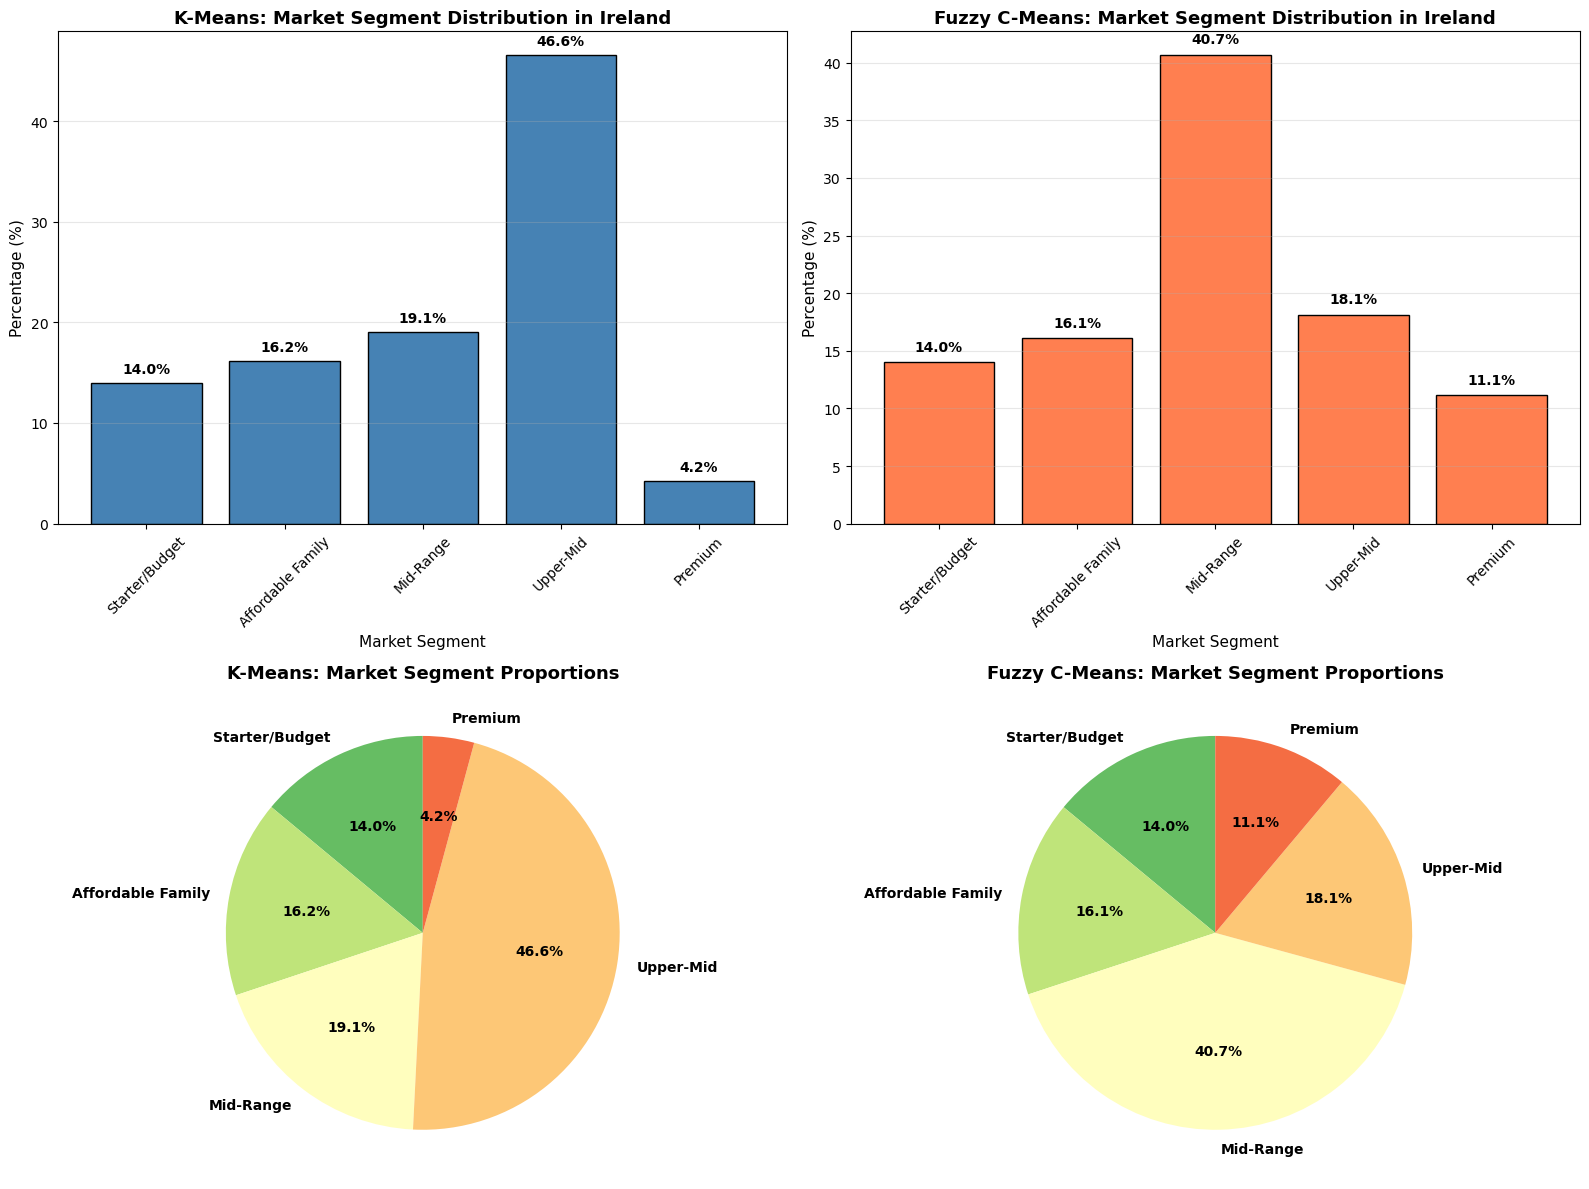

In [32]:
# Visualization for Market Segment Distribution across Ireland (all counties combined)

# Define the desired order for market segments
segment_order = ['Starter/Budget', 'Affordable Family', 'Mid-Range', 'Upper-Mid', 'Premium']#, 'Luxury']

# Create a comprehensive visualization comparing K-Means and Fuzzy C-Means for the entire country
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. K-Means: Overall Market Segment Distribution
kmeans_overall = data_final_kmeans_cleaned['Market_Segment'].value_counts()
kmeans_overall_pct = (kmeans_overall / kmeans_overall.sum() * 100).reindex(segment_order)

axes[0, 0].bar(kmeans_overall_pct.index, kmeans_overall_pct.values, color='steelblue', edgecolor='black')
axes[0, 0].set_title('K-Means: Market Segment Distribution in Ireland', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Market Segment', fontsize=11)
axes[0, 0].set_ylabel('Percentage (%)', fontsize=11)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(kmeans_overall_pct.values):
    axes[0, 0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 2. Fuzzy C-Means: Overall Market Segment Distribution
fuzzy_overall = data_final_fuzzy_cleaned['Market_Segment'].value_counts()
fuzzy_overall_pct = (fuzzy_overall / fuzzy_overall.sum() * 100).reindex(segment_order)

axes[0, 1].bar(fuzzy_overall_pct.index, fuzzy_overall_pct.values, color='coral', edgecolor='black')
axes[0, 1].set_title('Fuzzy C-Means: Market Segment Distribution in Ireland', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Market Segment', fontsize=11)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(fuzzy_overall_pct.values):
    axes[0, 1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 3. K-Means: Pie Chart
kmeans_colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(segment_order)))
axes[1, 0].pie(kmeans_overall_pct.values, labels=kmeans_overall_pct.index, autopct='%1.1f%%',
               colors=kmeans_colors, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 0].set_title('K-Means: Market Segment Proportions', fontsize=13, fontweight='bold')

# 4. Fuzzy C-Means: Pie Chart
fuzzy_colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(segment_order)))
axes[1, 1].pie(fuzzy_overall_pct.values, labels=fuzzy_overall_pct.index, autopct='%1.1f%%',
               colors=fuzzy_colors, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 1].set_title('Fuzzy C-Means: Market Segment Proportions', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

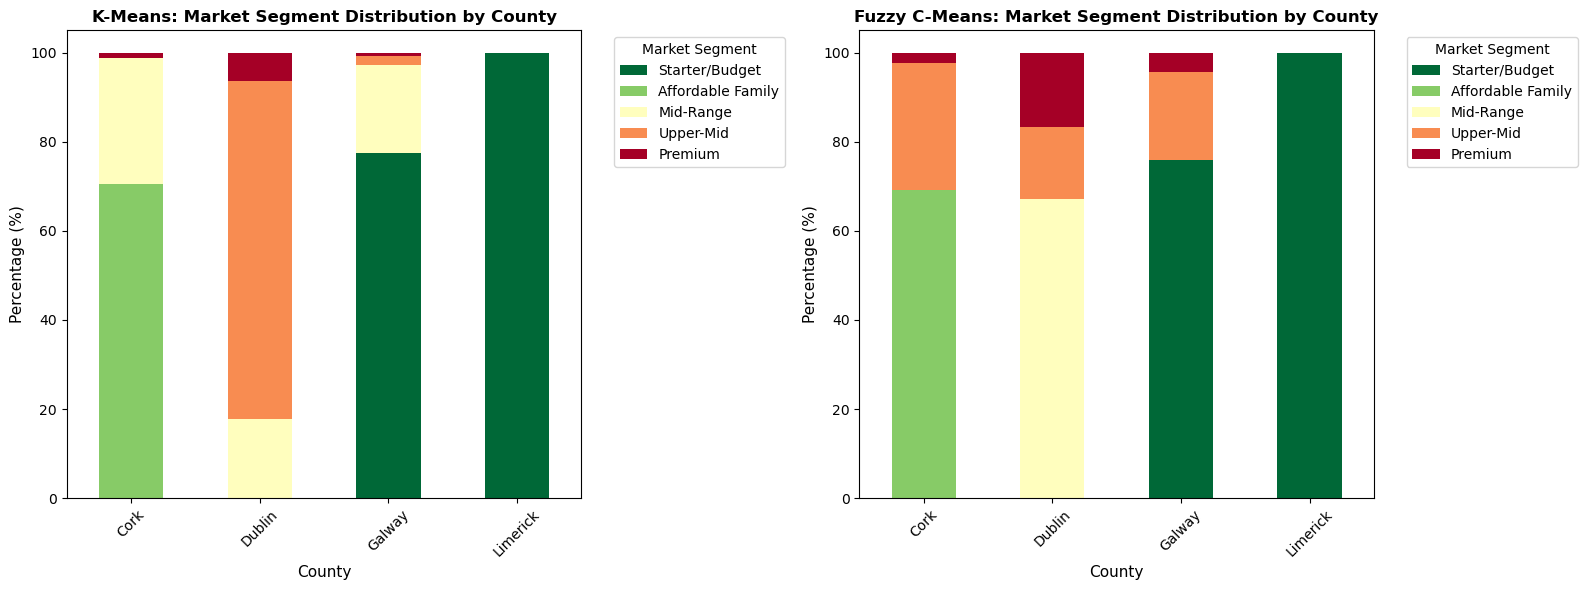

In [33]:
# Define the desired order for market segments
segment_order = ['Starter/Budget', 'Affordable Family', 'Mid-Range', 'Upper-Mid', 'Premium']#, 'Luxury']

# Compare market segment distribution across counties for both K-Means and Fuzzy C-Means

kmeans_county_segments = pd.crosstab(
    data_final_kmeans['County_Encoded'], 
    data_final_kmeans['Market_Segment'],
    normalize='index'
) * 100

# Map county codes back to names for better readability
county_names = {v: k for k, v in county_mapping.items()}
kmeans_county_segments.index = kmeans_county_segments.index.map(county_names)

# Reorder columns according to segment_order
kmeans_county_segments = kmeans_county_segments[segment_order]


fuzzy_county_segments = pd.crosstab(
    data_final_fuzzy_cleaned['County_Encoded'],
    data_final_fuzzy_cleaned['Market_Segment'],
    normalize='index'
) * 100

fuzzy_county_segments.index = fuzzy_county_segments.index.map(county_names)

# Reorder columns according to segment_order
fuzzy_county_segments = fuzzy_county_segments[segment_order]


# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means visualization
kmeans_county_segments.plot(kind='bar', stacked=True, ax=axes[0], colormap='RdYlGn_r')
axes[0].set_title('K-Means: Market Segment Distribution by County', fontsize=12, fontweight='bold')
axes[0].set_xlabel('County', fontsize=11)
axes[0].set_ylabel('Percentage (%)', fontsize=11)
axes[0].legend(title='Market Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Fuzzy C-Means visualization
fuzzy_county_segments.plot(kind='bar', stacked=True, ax=axes[1], colormap='RdYlGn_r')
axes[1].set_title('Fuzzy C-Means: Market Segment Distribution by County', fontsize=12, fontweight='bold')
axes[1].set_xlabel('County', fontsize=11)
axes[1].set_ylabel('Percentage (%)', fontsize=11)
axes[1].legend(title='Market Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\junio\AppData\Local\Temp\ipykernel_57296\1133393668.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=high_membership_no_luxury, x='Market_Segment', y='Price',


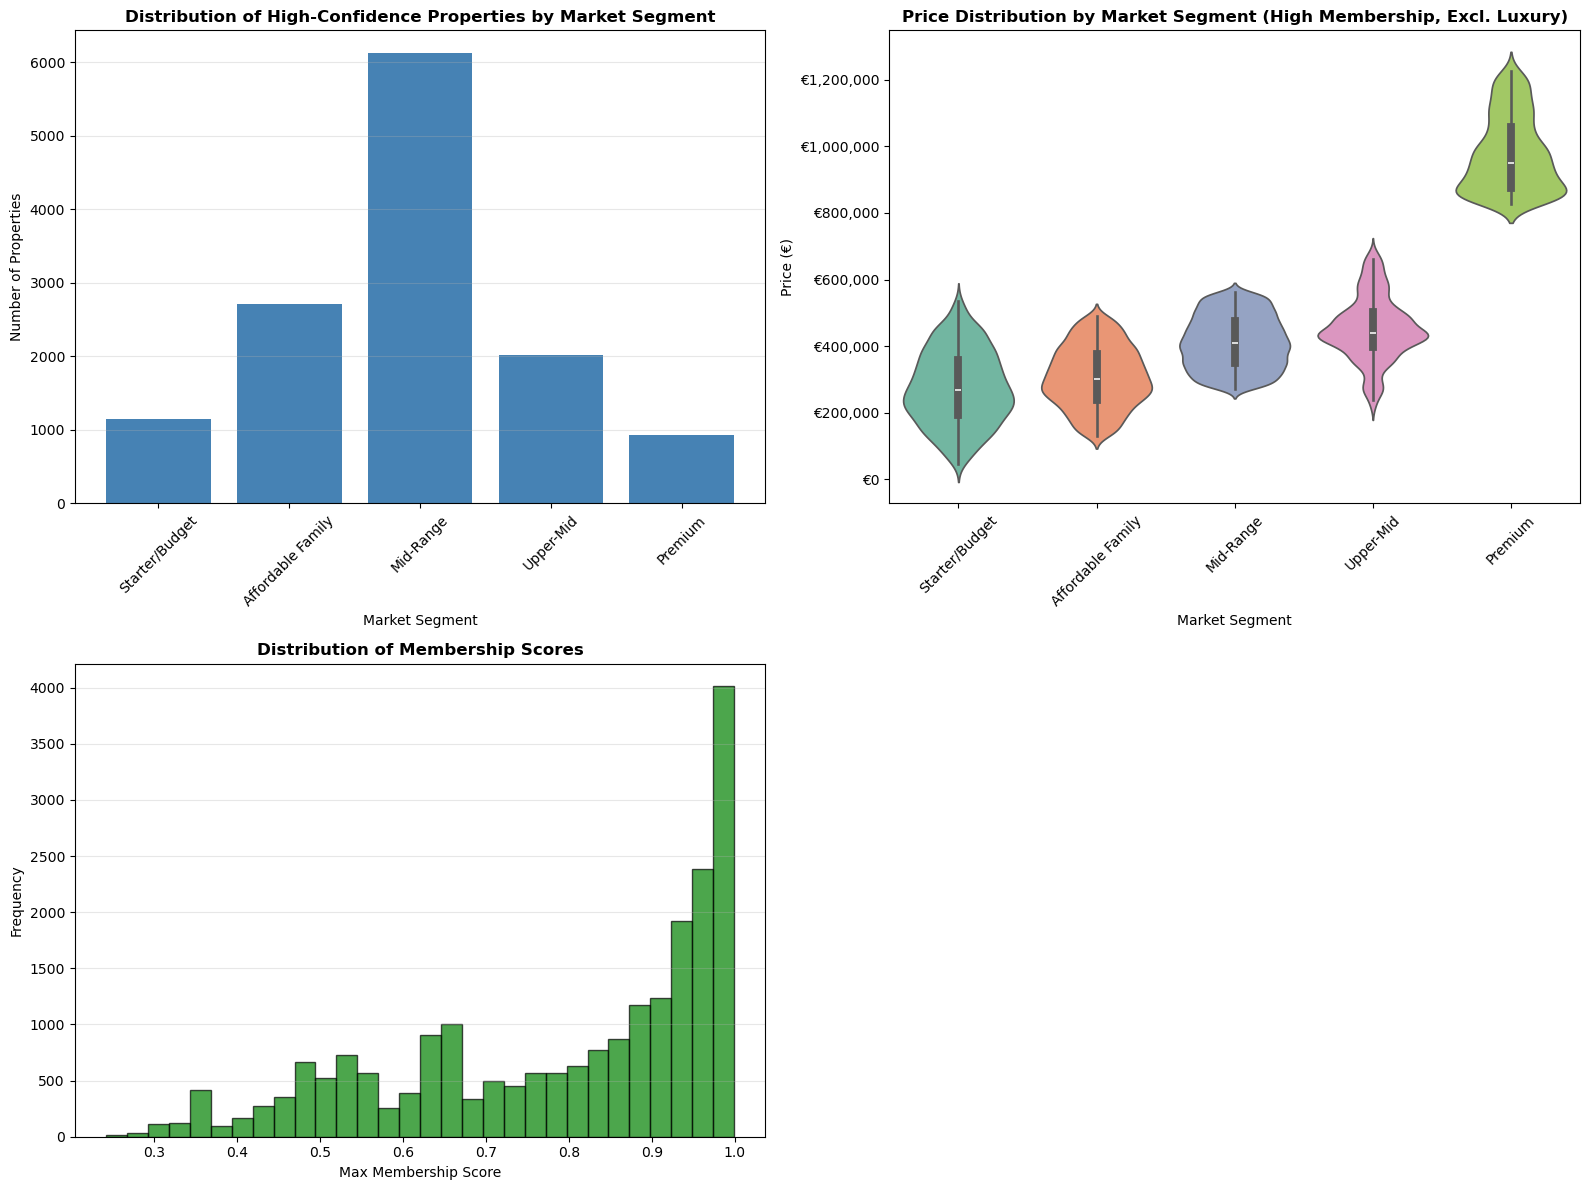

In [34]:
import seaborn as sns

# Visualization for Fuzzy Market Segment with high membership scores
# Filter for properties with high membership scores (> 0.8)
high_membership_threshold = 0.8
high_membership_data = data_final_fuzzy[data_final_fuzzy['Max_Membership'] > high_membership_threshold].copy()

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of high-confidence properties by segment
segment_counts = high_membership_data['Market_Segment'].value_counts().reindex(segment_order)
axes[0, 0].bar(segment_counts.index, segment_counts.values, color='steelblue')
axes[0, 0].set_title('Distribution of High-Confidence Properties by Market Segment', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Market Segment', fontsize=10)
axes[0, 0].set_ylabel('Number of Properties', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Price distribution by segment for high-confidence properties (excluding Luxury)
# Filter out Luxury segment for better visualization
high_membership_no_luxury = high_membership_data[high_membership_data['Market_Segment'] != 'Luxury'].copy()
segment_order_no_luxury = [s for s in segment_order if s != 'Luxury']

# Create violin plot
sns.violinplot(data=high_membership_no_luxury, x='Market_Segment', y='Price', 
               order=segment_order_no_luxury, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Price Distribution by Market Segment (High Membership, Excl. Luxury)', 
                     fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Market Segment', fontsize=10)
axes[0, 1].set_ylabel('Price (€)', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# 3. Membership score distribution
axes[1, 0].hist(data_final_fuzzy['Max_Membership'], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution of Membership Scores', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Max Membership Score', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].grid(axis='y', alpha=0.3)

# Hide the 4th subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


---
---
---
---
---
---
---
---
---
---
---
---

# Time Series Analysis: Analyzing trends, seasonality, and anomalies in property prices

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Time Series Analysis: Analyzing trends, seasonality, and anomalies in property prices

# Prepare time series data - aggregate by month
# Convert to time series with mean price per month
ts_data = data_ts_final.groupby(['Sale_Year', 'Sale_Month'])['Price'].agg(['mean', 'count']).reset_index()
ts_data['Date'] = pd.to_datetime(ts_data[['Sale_Year', 'Sale_Month']].assign(Day=1).rename(columns={'Sale_Year': 'year', 'Sale_Month': 'month', 'Day': 'day'}))
ts_data = ts_data.set_index('Date').sort_index()
ts_data.head()

,Sale_Year,Sale_Month,mean,count
Date,,,,
2010-01-01,2010,1,315884.965644,606
2010-02-01,2010,2,311822.398485,759
2010-03-01,2010,3,294365.778237,885
2010-04-01,2010,4,290905.751770,870
2010-05-01,2010,5,283225.258834,909


# Time Series defined by Mean

In [36]:
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Describing Trends for the ARIMA model

# Uses ts_data (mean price per month)

import matplotlib.pyplot as plt

# Prepare monthly series (ensure proper monthly index)
ts = ts_data['mean'].copy()
ts = ts.asfreq('MS')                     # set monthly start freq, will introduce NaNs for missing months
ts = ts.interpolate(method='time')       # fill short gaps by time interpolation (alternatively .ffill/.bfill)

print("Time series summary:")
print(ts.describe())

Time series summary:
count       190.000000
mean     370801.592271
std      102184.072011
min      218180.646785
25%      283828.428369
50%      348307.584506
75%      451846.518568
max      672471.335474
Name: mean, dtype: float64


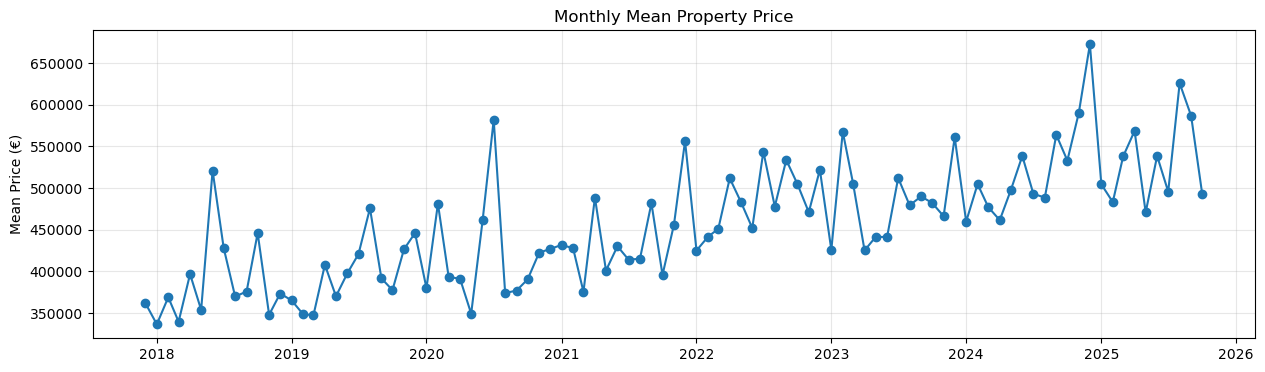

In [37]:
# Plot raw series
plt.figure(figsize=(15,4))
plt.plot(ts.tail(int(0.5*len(ts))), marker='o', linestyle='-') # plot last 50% of data
plt.title('Monthly Mean Property Price')
plt.ylabel('Mean Price (€)')
plt.grid(alpha=0.3)
plt.show()

In [38]:
# Stationarity test (ADF)
adf_res = adfuller(ts.dropna())

# Checks if a time series is stationary

In [39]:
# Decide differencing (d)
if adf_res[1] > 0.05:
    print("\nSeries appears non-stationary (p > 0.05). Applying first difference and re-testing.")
    ts_diff = ts.diff().dropna()
    adf_res_diff = adfuller(ts_diff)
    print(f"  After 1st diff, p-value: {adf_res_diff[1]:.4f}")
    d = 1 if adf_res_diff[1] <= 0.05 else 1  # keep d=1 as a sensible default if still ambiguous
else:
    print("\nSeries appears stationary (p <= 0.05). No differencing required.")
    ts_diff = ts.copy()
    d = 0


Series appears non-stationary (p > 0.05). Applying first difference and re-testing.
  After 1st diff, p-value: 0.0000


# Seasonal decomposition


Performing seasonal decomposition (period=12)...


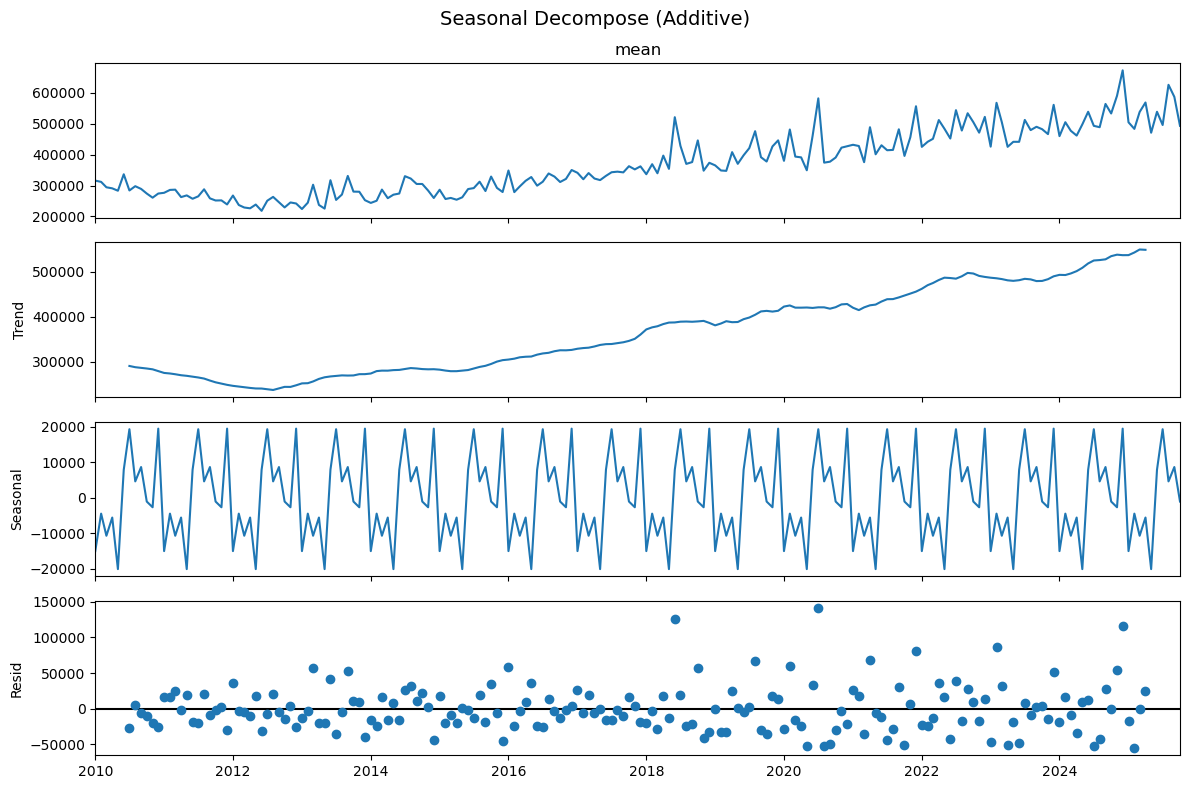

In [40]:
# Seasonal decomposition (assume yearly seasonality with period=12)
print(f"\nPerforming seasonal decomposition (period=12)...")
decomp = seasonal_decompose(ts.dropna(), model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12,8)
plt.suptitle('Seasonal Decompose (Additive)', fontsize=14)
plt.tight_layout()
plt.show()


# ACF & PACF


ACF / PACF plots (lags up to 24):


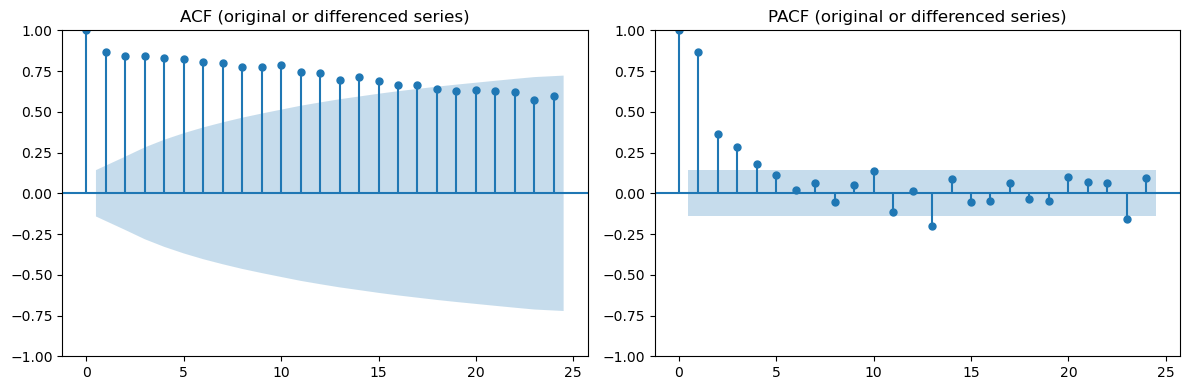

In [41]:
# ACF & PACF plots for identification of p and q
print("\nACF / PACF plots (lags up to 24):")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_acf(ts.dropna(), lags=24, ax=plt.gca())
plt.title('ACF (original or differenced series)')

plt.subplot(1,2,2)
plot_pacf(ts.dropna(), lags=24, ax=plt.gca(), method='ywm')
plt.title('PACF (original or differenced series)')
plt.tight_layout()
plt.show()

# Compute numeric ACF/PACF

In [42]:
# Compute numeric ACF/PACF values for a simple heuristic to suggest p and q
ts_for_ac = (ts_diff if d == 1 else ts).dropna()
n = len(ts_for_ac)
acf_vals = acf(ts_for_ac, nlags=24, fft=False)
pacf_vals = pacf(ts_for_ac, nlags=24, method='ywm')

# significance threshold (approximate) for lag correlation
# The value 1.96 comes from the standard normal distribution (Z-distribution) and represents the critical value for a 95% confidence level
sig_thresh = 1.96 / np.sqrt(n)

# p_suggest

In [43]:
# Heuristic: first lag where PACF drops inside the significance band => suggested p
p_suggest = None
for lag in range(1, len(pacf_vals)):
    if abs(pacf_vals[lag]) < sig_thresh:
        p_suggest = lag - 1 if lag - 1 >= 0 else 0
        break
if p_suggest is None:
    p_suggest = 1

# q_suggest

In [44]:
# Heuristic: first lag where ACF drops inside the band => suggested q
q_suggest = None
for lag in range(1, len(acf_vals)):
    if abs(acf_vals[lag]) < sig_thresh:
        q_suggest = lag - 1 if lag - 1 >= 0 else 0
        break
if q_suggest is None:
    q_suggest = 1

In [45]:
#pritn suggested p, d, q values
print(f"\nSuggested ARIMA parameters based on ACF/PACF heuristics:")
print(f"  p (AR order): {p_suggest}")
print(f"  d (differencing order): {d}")
print(f"  q (MA order): {q_suggest}")


Suggested ARIMA parameters based on ACF/PACF heuristics:
  p (AR order): 4
  d (differencing order): 1
  q (MA order): 1


In [46]:
from statsmodels.tsa.arima.model import ARIMA

# If you want to specify custom parameters, change the order tuple
model = ARIMA(ts, order=(p_suggest, d, q_suggest))
fitted_model = model.fit()

print(f"ARIMA({p_suggest}, {d}, {q_suggest}) model fitted successfully")
print("\nModel Summary:")
print(fitted_model.summary())

ARIMA(4, 1, 1) model fitted successfully

Model Summary:
                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  190
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -2280.097
Date:                Wed, 29 Oct 2025   AIC                           4572.195
Time:                        21:43:18   BIC                           4591.645
Sample:                    01-01-2010   HQIC                          4580.075
                         - 10-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0212      0.152      0.139      0.889      -0.277       0.319
ar.L2         -0.1036      0.112     -0.921      0.357      -0.324       0

ARIMA(4, 1, 1) model fitted on training data.

ARIMA Model Evaluation on Test Data:
  R-squared (R2): -0.3233
  Mean Absolute Error (MAE): 44,410.63
  Mean Squared Error (MSE): 3,723,549,358.86
  Root Mean Squared Error (RMSE): 61,020.89


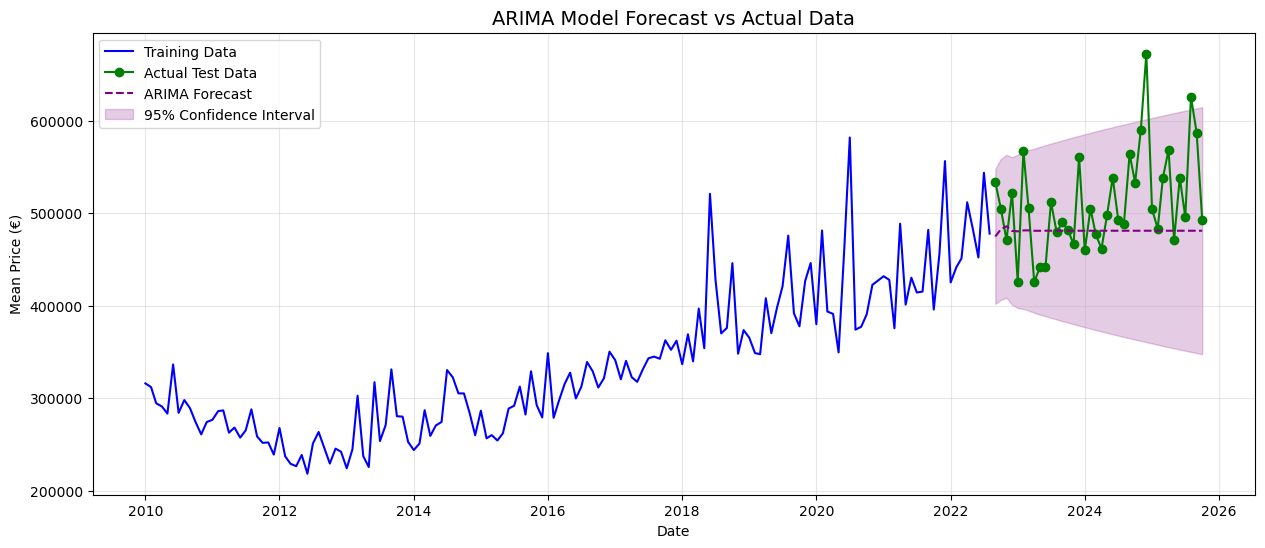

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt

# To evaluate the ARIMA model's forecasting capability, we'll use the same train/test split
# as the SARIMA model for a fair comparison.

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(ts) * 0.8)
train_data = ts[:train_size]
test_data = ts[train_size:]
forecast_steps = len(test_data)

# Fit the ARIMA model on the training data only
arima_train_model = ARIMA(train_data, order=(p_suggest, d, q_suggest))
arima_train_fitted = arima_train_model.fit()

print(f"ARIMA({p_suggest}, {d}, {q_suggest}) model fitted on training data.")

# Generate forecast for the test period
forecast = arima_train_fitted.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Evaluate the forecast
mae = mean_absolute_error(test_data, forecast_values)
mse = mean_squared_error(test_data, forecast_values)
rmse = np.sqrt(mse)
r2 = r2_score(test_data, forecast_values)

print("\nARIMA Model Evaluation on Test Data:")
print(f"  R-squared (R2): {r2:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:,.2f}")
print(f"  Mean Squared Error (MSE): {mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:,.2f}")

# Plot the forecast against the actual data
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Actual Test Data', color='green', marker='o')
plt.plot(test_data.index, forecast_values, label='ARIMA Forecast', color='purple', linestyle='--')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='purple', alpha=0.2, label='95% Confidence Interval')
plt.title('ARIMA Model Forecast vs Actual Data', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Mean Price (€)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# SARIMA

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [49]:
# Fit SARIMA model with seasonal parameters
# Based on the decomposition, we observed yearly seasonality (period=12)
# Using the ARIMA parameters identified earlier plus seasonal component

# SARIMA parameters: (p,d,q) x (P,D,Q,s)
# Non-seasonal: (p_suggest, d, q_suggest) = (4, 1, 1)
# Seasonal: (P, D, Q, s) where s=12 for monthly data
# P, D, Q are seasonal equivalents of p, d, q

# Start with simple seasonal parameters
P = 1  # Seasonal AR order
D = 1  # Seasonal differencing
Q = 1  # Seasonal MA order
s = 12 # Seasonal period (monthly data, yearly pattern)

print(f"Fitting SARIMA model with parameters:")
print(f"  Non-seasonal (p,d,q): ({p_suggest}, {d}, {q_suggest})")
print(f"  Seasonal (P,D,Q,s): ({P}, {D}, {Q}, {s})")

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(ts) * 0.8)
train_data = ts[:train_size]
test_data = ts[train_size:]
forecast_steps = len(test_data)

print(f"\nTrain data: {len(train_data)} months")
print(f"Test data: {len(test_data)} months")
print(f"Forecast steps: {forecast_steps}")


# Fit SARIMA model on training data
sarima_model = SARIMAX(train_data, 
                       order=(p_suggest, d, q_suggest),
                       seasonal_order=(P, D, Q, s),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_fitted = sarima_model.fit(disp=False)

print("\nSARIMA Model Summary:")
print(sarima_fitted.summary())

Fitting SARIMA model with parameters:
  Non-seasonal (p,d,q): (4, 1, 1)
  Seasonal (P,D,Q,s): (1, 1, 1, 12)

Train data: 152 months
Test data: 38 months
Forecast steps: 38

SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                               mean   No. Observations:                  152
Model:             SARIMAX(4, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1481.508
Date:                            Wed, 29 Oct 2025   AIC                           2979.016
Time:                                    21:43:19   BIC                           3001.514
Sample:                                01-01-2010   HQIC                          2988.155
                                     - 08-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975

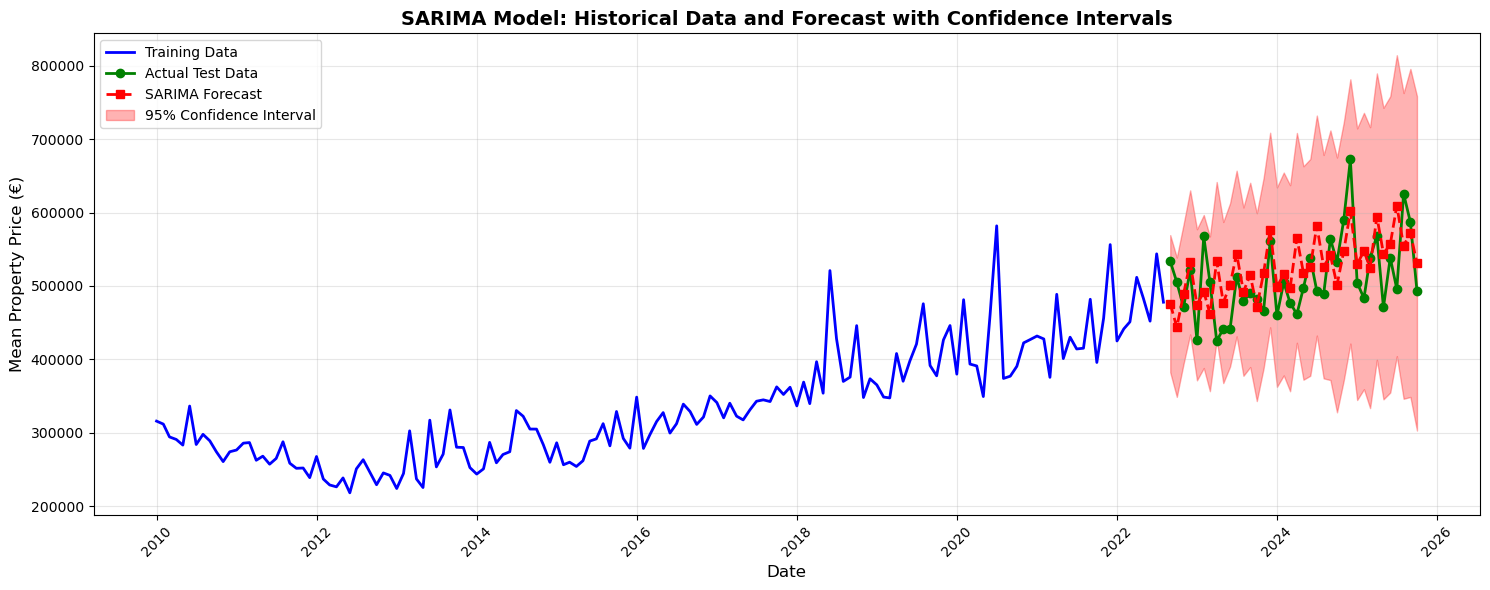

In [50]:
# Plot SARIMA forecast with confidence intervals
fig, ax1 = plt.subplots(1, 1, figsize=(15, 6))

# Get forecast with confidence intervals
sarima_forecast_ci = sarima_fitted.get_forecast(steps=forecast_steps)
forecast_df = sarima_forecast_ci.summary_frame(alpha=0.05)  # 95% confidence interval
sarima_forecast_values = sarima_forecast_ci.predicted_mean.values

# Plot historical data
ax1.plot(train_data.index, train_data.values, label='Training Data', color='blue', linewidth=2)
ax1.plot(test_data.index, test_data.values, label='Actual Test Data', color='green', linewidth=2, marker='o')

# Plot SARIMA forecast
ax1.plot(test_data.index, sarima_forecast_values, label='SARIMA Forecast', 
         color='red', linewidth=2, linestyle='--', marker='s')

# Plot confidence intervals
ax1.fill_between(test_data.index, 
                 forecast_df['mean_ci_lower'].values,
                 forecast_df['mean_ci_upper'].values,
                 alpha=0.3, color='red', label='95% Confidence Interval')

ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Mean Property Price (€)', fontsize=12)
ax1.set_title('SARIMA Model: Historical Data and Forecast with Confidence Intervals', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [51]:
test_data.shape

(38,)

In [52]:
sarima_forecast_values.shape

(38,)

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluate the forecast against the actual test data

mae = mean_absolute_error(test_data, sarima_forecast_values)
mse = mean_squared_error(test_data, sarima_forecast_values)
rmse = np.sqrt(mse)
r2 = r2_score(test_data, sarima_forecast_values)

print("SARIMA Model Evaluation on Test Data:")
print(f"  R-squared (R2): {r2:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:,.2f}")
print(f"  Mean Squared Error (MSE): {mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:,.2f}")

SARIMA Model Evaluation on Test Data:
  R-squared (R2): 0.0555
  Mean Absolute Error (MAE): 42,760.33
  Mean Squared Error (MSE): 2,657,616,204.81
  Root Mean Squared Error (RMSE): 51,552.07


In [54]:

# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test_data, sarima_forecast_values)}, index=[0])

# Add columns in the dataframe 'evaluation_results'
evaluation_results['mean_absolute_error'] = mean_absolute_error(test_data, sarima_forecast_values)
evaluation_results['mean_squared_error'] = mean_squared_error(test_data, sarima_forecast_values)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_data, sarima_forecast_values))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(sarima_forecast_values - test_data) / np.abs(test_data)) * 100

# Display the results
evaluation_results



,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.055535,42760.334442,2.657616e+09,51552.07275,8.559389


# Anomalies 

In [55]:
# Anomaly Detection using ARIMA residuals

# Use the fitted ARIMA model to detect anomalies in the time series
# Anomalies are identified as observations where the residual (actual - predicted) 
# exceeds a threshold (typically 2-3 standard deviations)

# Get fitted values and residuals from the full dataset model
fitted_values = fitted_model.fittedvalues
residuals = fitted_model.resid

# Calculate threshold for anomaly detection (2 standard deviations)
residual_std = residuals.std()
threshold = 2 * residual_std

# Identify anomalies
anomalies = np.abs(residuals) > threshold
anomaly_dates = ts[anomalies].index
anomaly_values = ts[anomalies].values
anomaly_residuals = residuals[anomalies].values

print(f"Anomaly Detection Results:")
print(f"Total observations: {len(ts)}")
print(f"Number of anomalies detected: {anomalies.sum()}")
print(f"Percentage of anomalies: {(anomalies.sum() / len(ts)) * 100:.2f}%")
print(f"Residual standard deviation: {residual_std:,.2f}")
print(f"Anomaly threshold (±2σ): ±{threshold:,.2f}")

# Display anomalies
print("\nDetected Anomalies:")
anomaly_df = pd.DataFrame({
    'Date': anomaly_dates,
    'Actual_Price': anomaly_values,
    'Fitted_Price': fitted_values[anomalies].values,
    'Residual': anomaly_residuals,
    'Abs_Residual': np.abs(anomaly_residuals)
}).sort_values('Abs_Residual', ascending=False)

Anomaly Detection Results:
Total observations: 190
Number of anomalies detected: 8
Percentage of anomalies: 4.21%
Residual standard deviation: 47,070.88
Anomaly threshold (±2σ): ±94,141.76

Detected Anomalies:


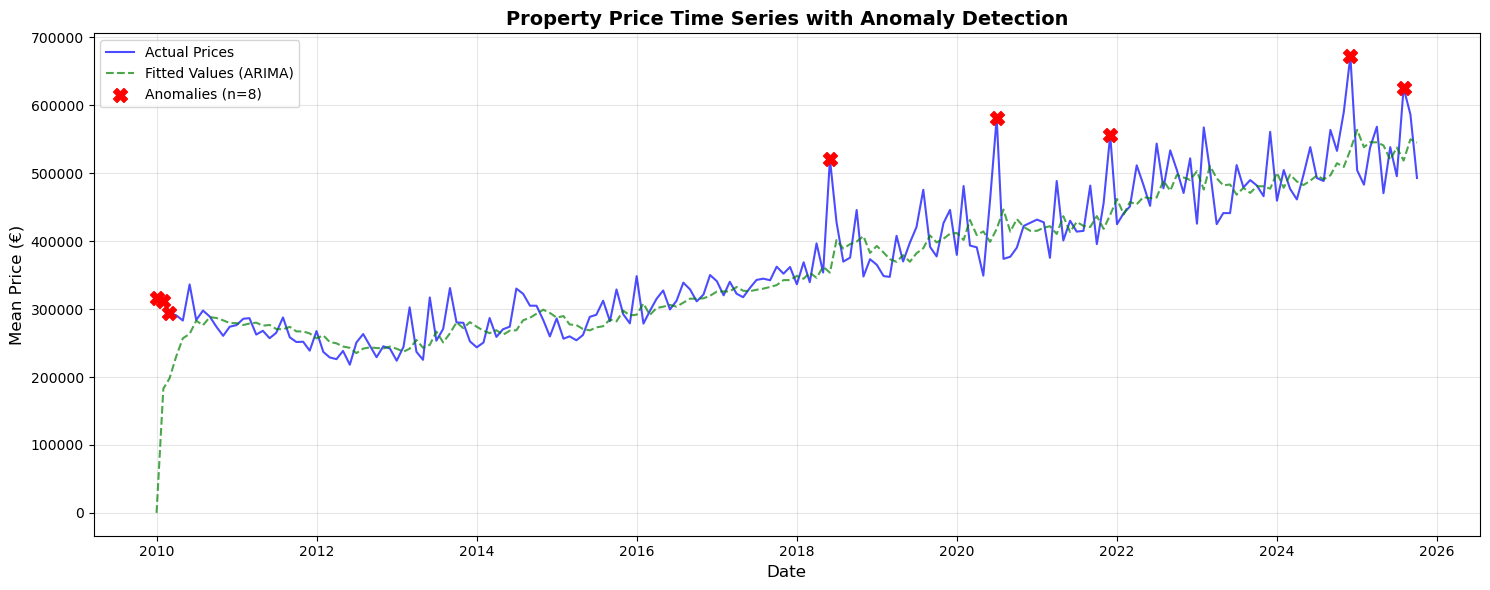

In [56]:
# Visualization for Anomaly Detection

# Create a comprehensive visualization of anomalies in the time series
fig, ax = plt.subplots(figsize=(15, 6))

# Time series with anomalies highlighted
ax.plot(ts.index, ts.values, label='Actual Prices', color='blue', linewidth=1.5, alpha=0.7)
ax.plot(fitted_values.index, fitted_values.values, label='Fitted Values (ARIMA)', 
    color='green', linewidth=1.5, linestyle='--', alpha=0.7)
ax.scatter(anomaly_dates, anomaly_values, color='red', s=100, 
       label=f'Anomalies (n={len(anomaly_dates)})', zorder=5, marker='X')
ax.set_title('Property Price Time Series with Anomaly Detection', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Mean Price (€)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
